## **Team Members:**

---
- **Ajithkumar Pola** (101130142)
- **Charan Nellam** (101162936)
- **Sai Krishna Chiruvella** (101163019)
- **Hemanth Chitla** (101144029)
- **Rahul Thaneeru** (101144592)
- **Venkatanagasai Gajula** (101145485)

---

**Git Hub repo:**https://github.com/Jither435

## **Documentation**

## **Project Title: Iris Flower Species Classification using Support Vector Machine (SVM)**

---

**Introduction:**
The Iris Flower Species Classification project aims to build a machine learning model capable of predicting the species of iris flowers based on their sepal and petal measurements. The dataset used in this project is the Iris dataset, a popular benchmark dataset in machine learning, which contains measurements for three species of iris flowers: Setosa, Versicolor, and Virginica.

---

**1. Data Exploration and Preparation:**
   - Explored the structure and features of the Iris dataset.
   - Checked for missing values and handled them if present.
   - Removed duplicate entries from the dataset.
   - Prepared the feature matrix (X) and target vector (y).
   - Standardized the features to ensure uniform scale.


## **Step 1: Data Exploration and Preparation**

In [38]:
# Importing necessary libraries
from sklearn import datasets
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()

# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Exploring the dataset
print("Dataset Structure:")
print(iris_df.info())

print("\nFirst Few Rows of the Dataset:")
print(iris_df.head())

print("\nStatistical Summary of the Dataset:")
print(iris_df.describe())

# Check for missing values
if iris_df.isnull().any().any():
    print("\nNull values detected. Handling...")
    iris_df.dropna(inplace=True)
    print("Null values handled.")
else:
    print("\nNo null values exist!")

# Check for duplicate rows
duplicate_rows = iris_df.duplicated()
print("\nDuplicate Rows:")
print(duplicate_rows.sum())
if duplicate_rows.sum() > 0:
    iris_df = iris_df[~duplicate_rows]
    print("Removed duplicate entries")


Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

First Few Rows of the Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4  


**5. Visualization:**
   - Visualized histograms for each feature to understand the distribution of data within each class.
   - Created boxplots for each feature by target class to identify potential outliers and variations across classes.
   - Generated pairwise relationship plots (scatter plots) between features to observe patterns and relationships between variables.

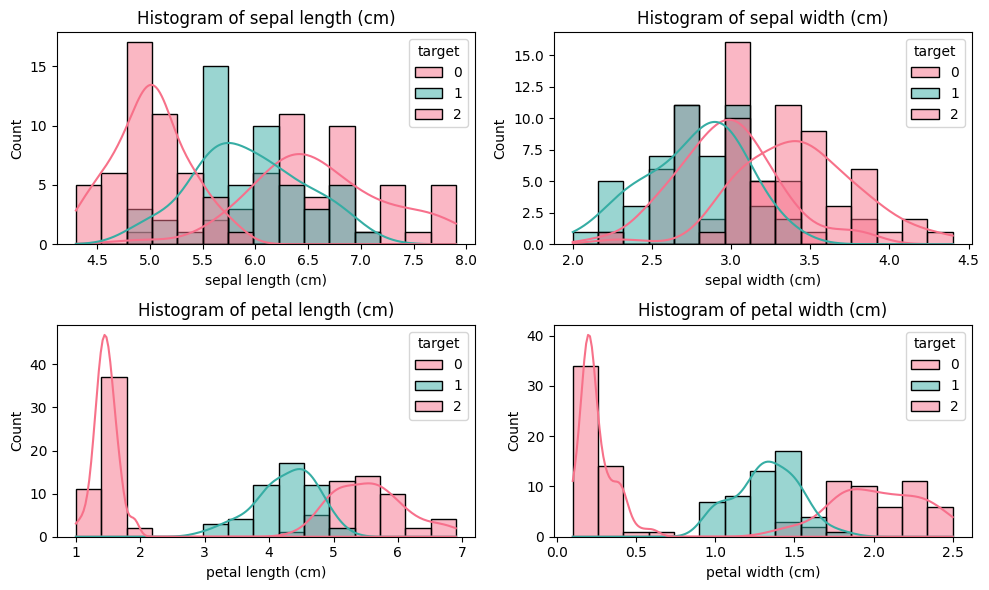

<ipython-input-43-5227f0380222>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=iris_df, palette=new_palette)
<ipython-input-43-5227f0380222>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=iris_df, palette=new_palette)
<ipython-input-43-5227f0380222>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=iris_df, palette=new_palette)
<ipython-input-43-5227f0380222>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

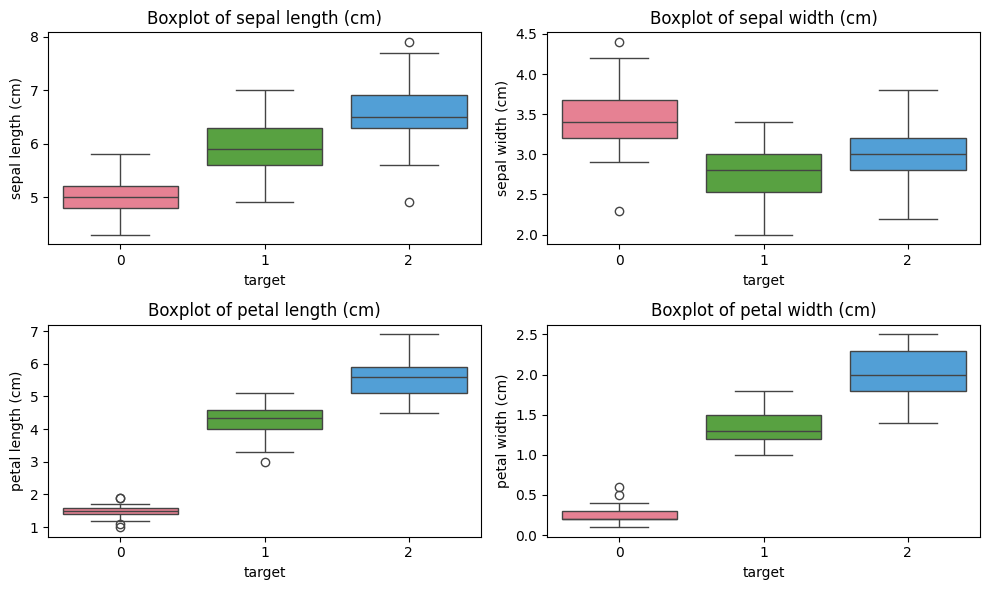

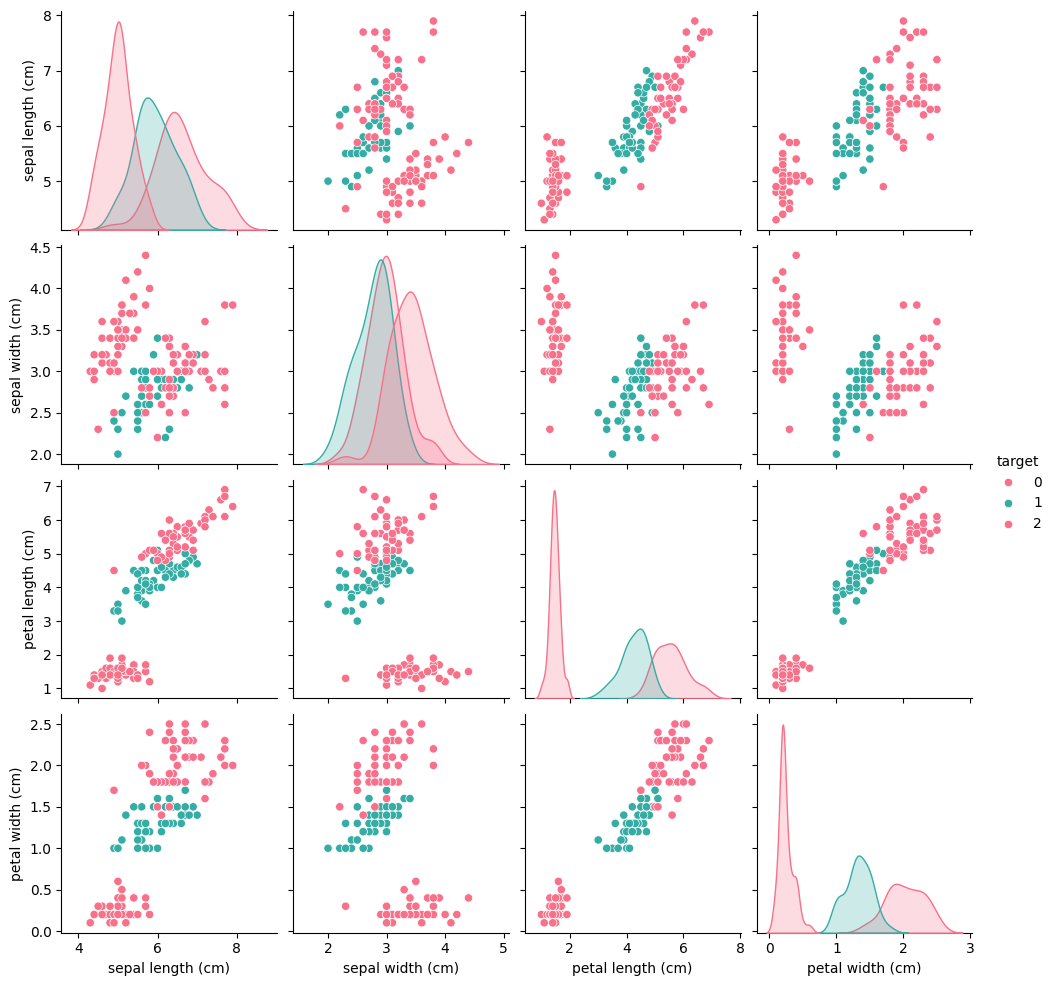

In [43]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Define a new color palette
new_palette = "husl"  # You can choose any other palette provided by seaborn

# Visualizing histograms for each feature with the new color palette
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, kde=True, hue='target', bins=15, palette=new_palette)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Visualizing boxplots for each feature by target class with the new color palette
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=iris_df, palette=new_palette)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Visualizing pairwise relationships between features with the new color palette
sns.pairplot(iris_df, hue='target', palette=new_palette)
plt.show()


## **Step 2: SVM Implementation**

---

**2. SVM Implementation:**
   - Implemented a Support Vector Machine (SVM) classifier using Python's Scikit-learn library.
   - Utilized GridSearchCV for hyperparameter tuning to find the optimal combination of parameters.
   - Experimented with different SVM kernels (linear, polynomial, radial basis function, and sigmoid) and parameter values.
   - Selected the best SVM model based on performance metrics.

---


In [39]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Splitting the dataset into features (X) and target labels (y)
X = iris_df.drop(columns=['target'])
y = iris_df['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining parameter grid for GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Initializing SVM classifier
svm_model = SVC(random_state=42)

# Performing GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters found by GridSearchCV:")
print(best_params)
print("Best accuracy found by GridSearchCV:", best_accuracy)


Best parameters found by GridSearchCV:
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy found by GridSearchCV: 0.9583333333333333


## **Step 3: K-fold Cross-Validation**

**3. K-fold Cross-Validation:**
   - Applied K-fold cross-validation with K=5 to assess the performance of the SVM model.
   - Ensured that the dataset was shuffled before partitioning to prevent bias.

---


In [40]:
# Importing necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Initializing SVM classifier with the best parameters
best_svm_model = SVC(**best_params, random_state=42)

# Performing K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

# Printing cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [1.         0.95833333 1.         0.83333333 1.        ]
Mean cross-validation score: 0.9583333333333334


## Visualization

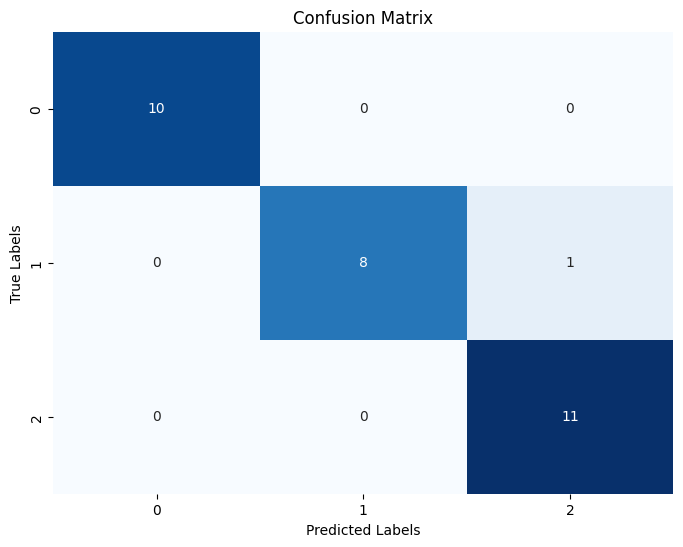

In [45]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix

# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**4. Evaluation Metrics:**
   - Evaluated the performance of the SVM model using accuracy as the primary metric.
   - Computed additional evaluation metrics such as precision, recall, and F1-score to assess the model's performance across different SVM configurations.
   - Interpreted the results and compared them to identify the most effective SVM configuration.



## **Step 4: Evaluation Metrics**

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



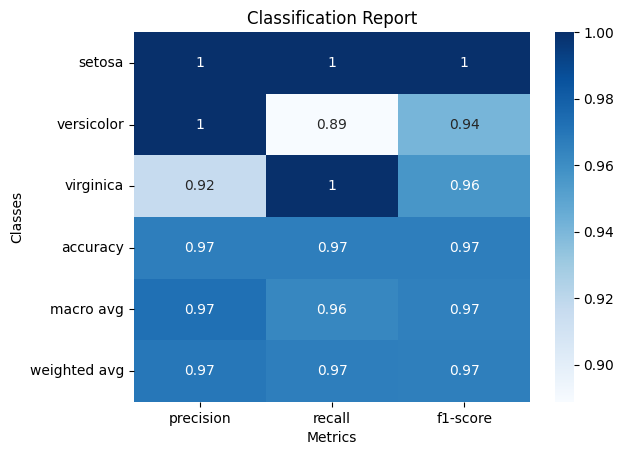

In [47]:
# Importing necessary libraries
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Training SVM classifier with the best parameters
best_svm_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualizing the classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()




**Conclusion:**
The Iris Flower Species Classification project successfully built and evaluated a classification model based on Support Vector Machine (SVM). Through hyperparameter tuning and cross-validation, the optimal SVM configuration was determined, achieving high accuracy in predicting the species of iris flowers. The visualization techniques employed provided insights into the distribution and relationships of features within the dataset.

---

**References:**
- Scikit-learn Documentation: https://scikit-learn.org/stable/documentation.html
- Seaborn Documentation: https://seaborn.pydata.org/documentation.html
- Matplotlib Documentation: https://matplotlib.org/stable/contents.html